In [1]:
import msgpack
import numpy as np

Read the MessagePack binary file:

In [2]:
with open("SPE10.mpk", "rb") as fp:
    raw_bytes = fp.read()

Unpack raw bytes:

In [3]:
def ext_hook(code, data):
    """Read code-2 data as float32 numpy arrays."""
    if code == 2:
        return np.frombuffer(data, dtype=np.float32)
    return ExtType(code, data)

summary = msgpack.unpackb(raw_bytes, strict_map_key=False, use_list=False, ext_hook=ext_hook)

We are ready to plot:

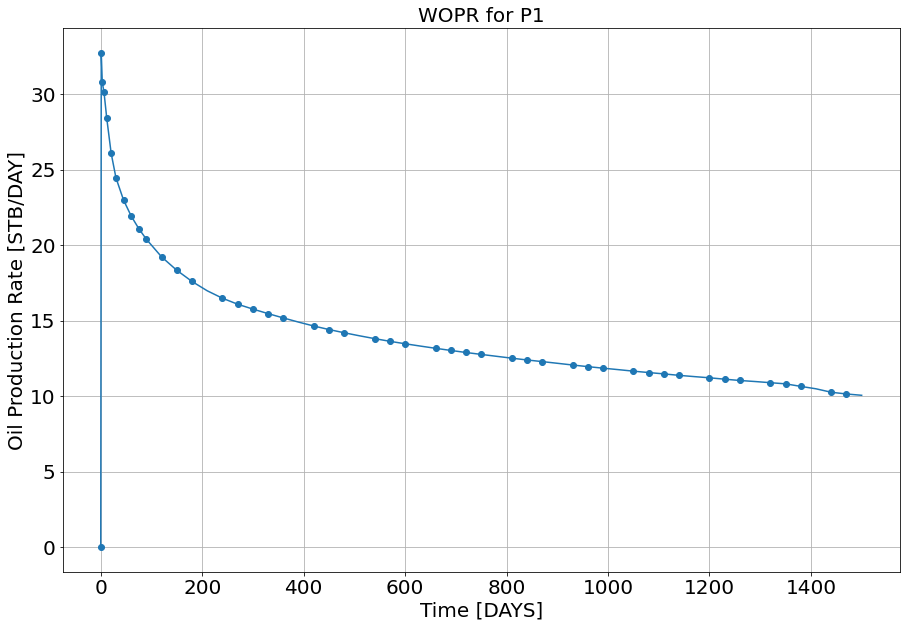

In [4]:
import matplotlib.pyplot as plt

well_name = 'P1'
msrmnt_name = 'WOPR'

time = summary['time']['TIME']
msrmnt = summary['wells'][well_name][msrmnt_name]

f, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.plot(time['values'], msrmnt['values'], 'o-', markevery=0.02);
ax.grid()
ax.set_title(f'{msrmnt_name} for {well_name}')
ax.set_xlabel(f'Time [{time["unit"]}]');
ax.set_ylabel(f'Oil Production Rate [{msrmnt["unit"]}]');

# adjust all font sizes in one sweeping motion
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)